# Assignment 1: Clustering

Let us start looking at some real machine learning algorithms. In this task we’re going to cluster the dataset, and see some natural groups formed based on the similarity of songs.

In [3]:
import nbimporter
nbimporter.options['only_defs'] = False
import importlib
%matplotlib notebook

import dataset_config
from helpers_and_data_parsing import pre_process_cluster_data, remove_duplicates, print_kmeans, print_dbscan, print_agglomerative

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


## K-Means

**Task:** The following cells contain the implementation of k-means. Run the cells to load and run the algorithm. Try running the algorithm with different parameters. E.g., see what happens when you change the number of clusters to construct. There is a TODO where you can change the parameters.

In [4]:
def cluster_with_kmeans_on_reduced_data(reduced_data):
    """
    Runs the kmeans clustering algorithm on the reduced data.
    :param reduced_data: All features gathered from the dataset
    """

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .01  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 0.5, reduced_data[:, 0].max() + 0.5
    y_min, y_max = reduced_data[:, 1].min() - 0.5, reduced_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # TODO: Change parameters for the reduced data kmeans algorithm here
    kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10,
                    max_iter=300, tol=0.0001, precompute_distances='auto',
                    verbose=0, random_state=None, copy_x=True, n_jobs=1,
                    algorithm='auto')

    kmeans.fit(X=reduced_data, y=None)

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    return Z.reshape(xx.shape), kmeans, x_min, x_max, y_min, y_max, xx, yy, kmeans.labels_


In [7]:
def run_kmeans():
    """
    Runs the kmeans clustering algorithm.
    :param X_data: All features gathered from the dataset in form of (n_features, n_songs)
    :param reduced_data: The result of the PCA-reduced data on the original data.
    :param X_songname: Corresponding songname
    :param X_artist: Corresponding artist
    """
    importlib.reload(dataset_config)
    
    # For printing to console
    np.set_printoptions(threshold=np.inf)

    # Getting all audio features from my likeable songs
    audio_features = dataset_config.likeable_songs

    # Remove duplicates
    audio_features = remove_duplicates(audio_features)

    # X_data is the features you have chosen.
    X_data, X_songname, X_artist = pre_process_cluster_data(audio_features)

    # Simply normalize all data
    X_data = StandardScaler().fit_transform(X_data)

    # X_data's dimensions are reduced to n_components.
    reduced_data = PCA(n_components=2).fit_transform(X_data)

    # Clustering based on the original data. Gives more precise results, but can't be visualized
    # kmeans_y_labels = k_means.cluster_with_kmeans_on_original_data(X_data)
    # print(kmeans_y_labels)

    # Clustering on PCA-reduced data. Can be visualized, but gives more unprecise results
    Z, kmeans, x_min, x_max, y_min, y_max, xx, yy, X_labels = cluster_with_kmeans_on_reduced_data(reduced_data)
    print_kmeans(Z, xx, yy, reduced_data, X_songname, X_artist, X_labels, kmeans, x_min, x_max, y_min, y_max)

**Tasks**: 
1. The following cell will run K-means and display the clusters. Study the graph and see if you see anything interesting. From your perspective, do the clusters make sense? Use the mouse pointer and hover over the data points to display song information. 

2. If you have not already done so, hand-pick the features you would like to use for clustering songs. Try different selections and see if this affects your clusters in any way. Does any of the features seem to make more impact that the others. Please do compare and discuss with your comrades.


Unpickling playlists
 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 
Unpickling playlists
 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 


<IPython.core.display.Javascript object>


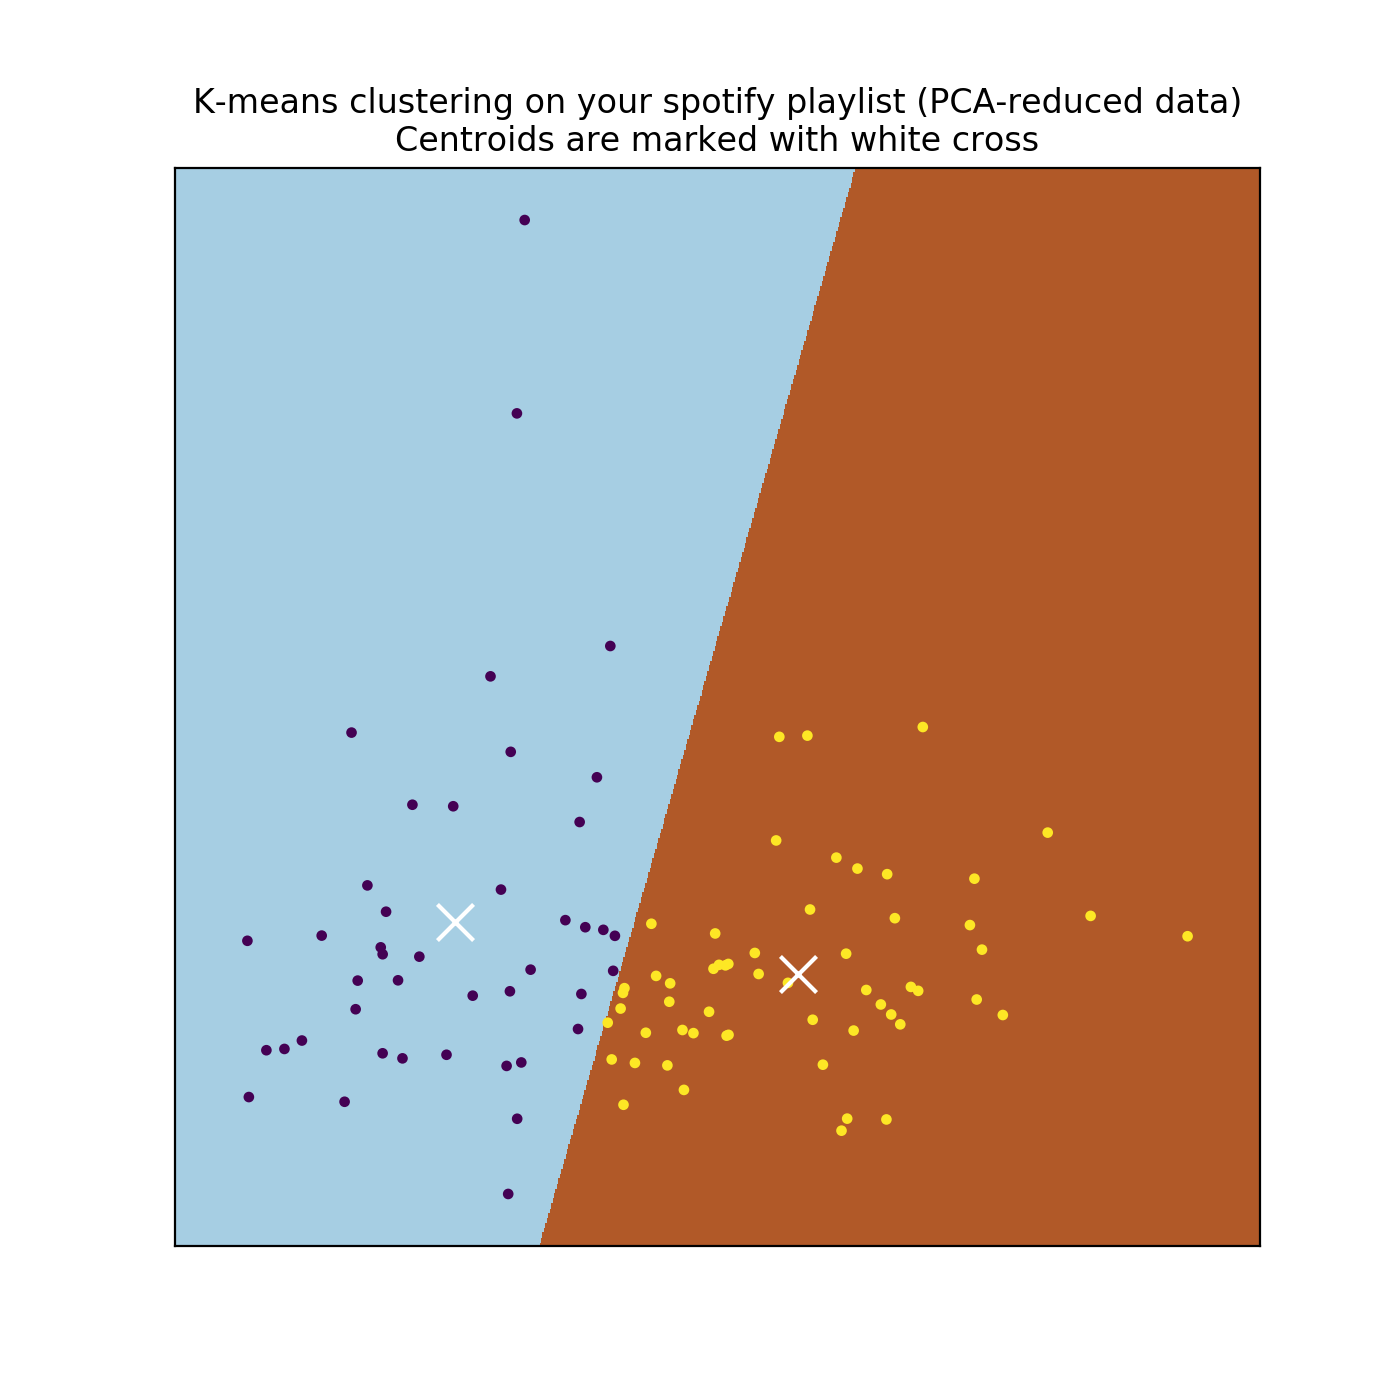

In [9]:
# Run KMeans clustering
run_kmeans()

## DBSCAN

**Task**: The following cells contain the implementation for DBSCAN. Run similar experiments for DBSCAN as you did for K-Means.

In [12]:
def cluster_with_dbscan(data):
    """
    Runs the dbscan clustering algorithm.
    :param data: All features gathered from the dataset
    """

    # TODO: Change parameters from here
    db = DBSCAN(eps=0.34, min_samples=15, metric='euclidean',
                metric_params=None, algorithm='auto', leaf_size=30,
                p=None, n_jobs=1).fit(data)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    return n_clusters_, labels, core_samples_mask

In [15]:
def run_dbscan():
    """
    Runs the dbscan clustering algorithm.
    :param X_data: All features gathered from the dataset in form of (n_features, n_songs)
    :param reduced_data: The result of the PCA-reduced data on the original data.
    :param X_songname: Corresponding songname
    :param X_artist: Corresponding artist
    """
    importlib.reload(dataset_config)
    
    # For printing to console
    np.set_printoptions(threshold=np.inf)

    # Getting all audio features from my likeable songs
    audio_features = dataset_config.likeable_songs

    # Remove duplicates
    audio_features = remove_duplicates(audio_features)

    # X_data is the features you have chosen.
    X_data, X_songname, X_artist = pre_process_cluster_data(audio_features)

    # Simply normalize all data
    X_data = StandardScaler().fit_transform(X_data)

    # X_data's dimensions are reduced to n_components.
    reduced_data = PCA(n_components=2).fit_transform(X_data)

    # Clustering based on the original data. Gives more precise results, but can't be visualized
    n_clusters_, labels, core_samples_mask = cluster_with_dbscan(X_data)
    # print(labels)

    # Clustering on PCA-reduced data. Can be visualized, but gives more unprecise results
    n_clusters_, labels, core_samples_mask = cluster_with_dbscan(reduced_data)
    print_dbscan(labels, reduced_data, n_clusters_, core_samples_mask, X_songname, X_artist)

Unpickling playlists
 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 
Unpickling playlists
 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 


<IPython.core.display.Javascript object>


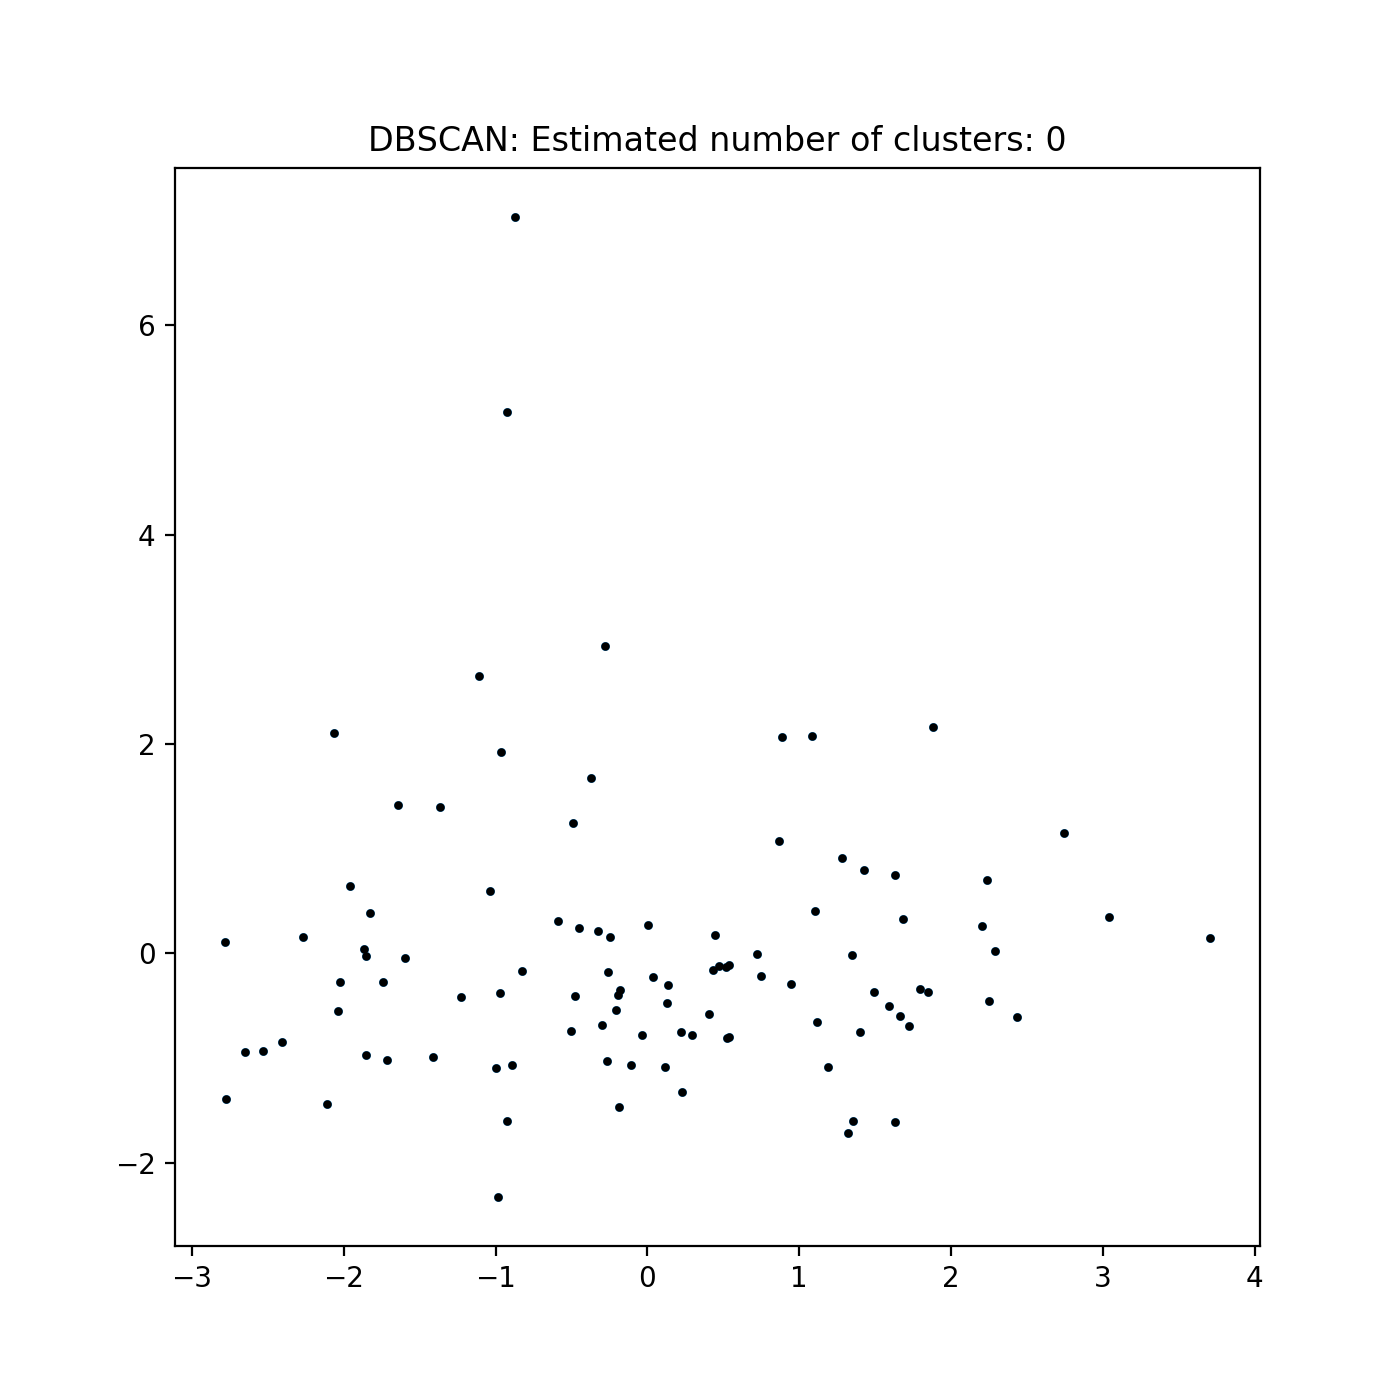

In [16]:
# Run DBSCAN clustering
run_dbscan()

## Agglomerative Hierarchical Clustering

**Task:** The following cells contain the implementation for agglomerative hierarchical clustering. Run similar experiments here as well.

In [19]:
def cluster_with_agglomerative(data):
    """
    Runs the hierarchical agglomerative clustering algorithm.
    :param data: All features gathered from the dataset
    """

    # TODO: Change parameters from here
    agglomerative = AgglomerativeClustering(n_clusters=1, affinity='euclidean', memory=None,
                                            connectivity=None, compute_full_tree='auto',
                                            linkage='ward', pooling_func=np.mean)

    agglomerative.fit(X=data, y=None)

    return agglomerative.labels_

In [22]:
def run_agglomerative():
    """
    Runs the agglomerative clustering algorithm.
    :param X_data: All features gathered from the dataset in form of (n_features, n_songs)
    :param reduced_data: The result of the PCA-reduced data on the original data.
    :param X_songname: Corresponding songname
    :param X_artist: Corresponding artist
    """
    importlib.reload(dataset_config)
    
    # For printing to console
    np.set_printoptions(threshold=np.inf)

    # Getting all audio features from my likeable songs
    audio_features = dataset_config.likeable_songs

    # Remove duplicates
    audio_features = remove_duplicates(audio_features)

    # X_data is the features you have chosen.
    X_data, X_songname, X_artist = pre_process_cluster_data(audio_features)

    # Simply normalize all data
    X_data = StandardScaler().fit_transform(X_data)

    # X_data's dimensions are reduced to n_components.
    reduced_data = PCA(n_components=2).fit_transform(X_data)

    # Clustering based on the original data. Gives more precise results, but can't be visualized
    # agglomerative_y_labels = agglomerative.cluster_with_agglomerative(X_data)
    # print(agglomerative_y_labels)

    # Clustering on PCA-reduced data. Can be visualized, but gives more unprecise results
    X_labels = cluster_with_agglomerative(reduced_data)
    print_agglomerative(reduced_data, X_labels, X_songname, X_artist)


Unpickling playlists
 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 
Unpickling playlists
 |XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX| 100.0% 


<IPython.core.display.Javascript object>


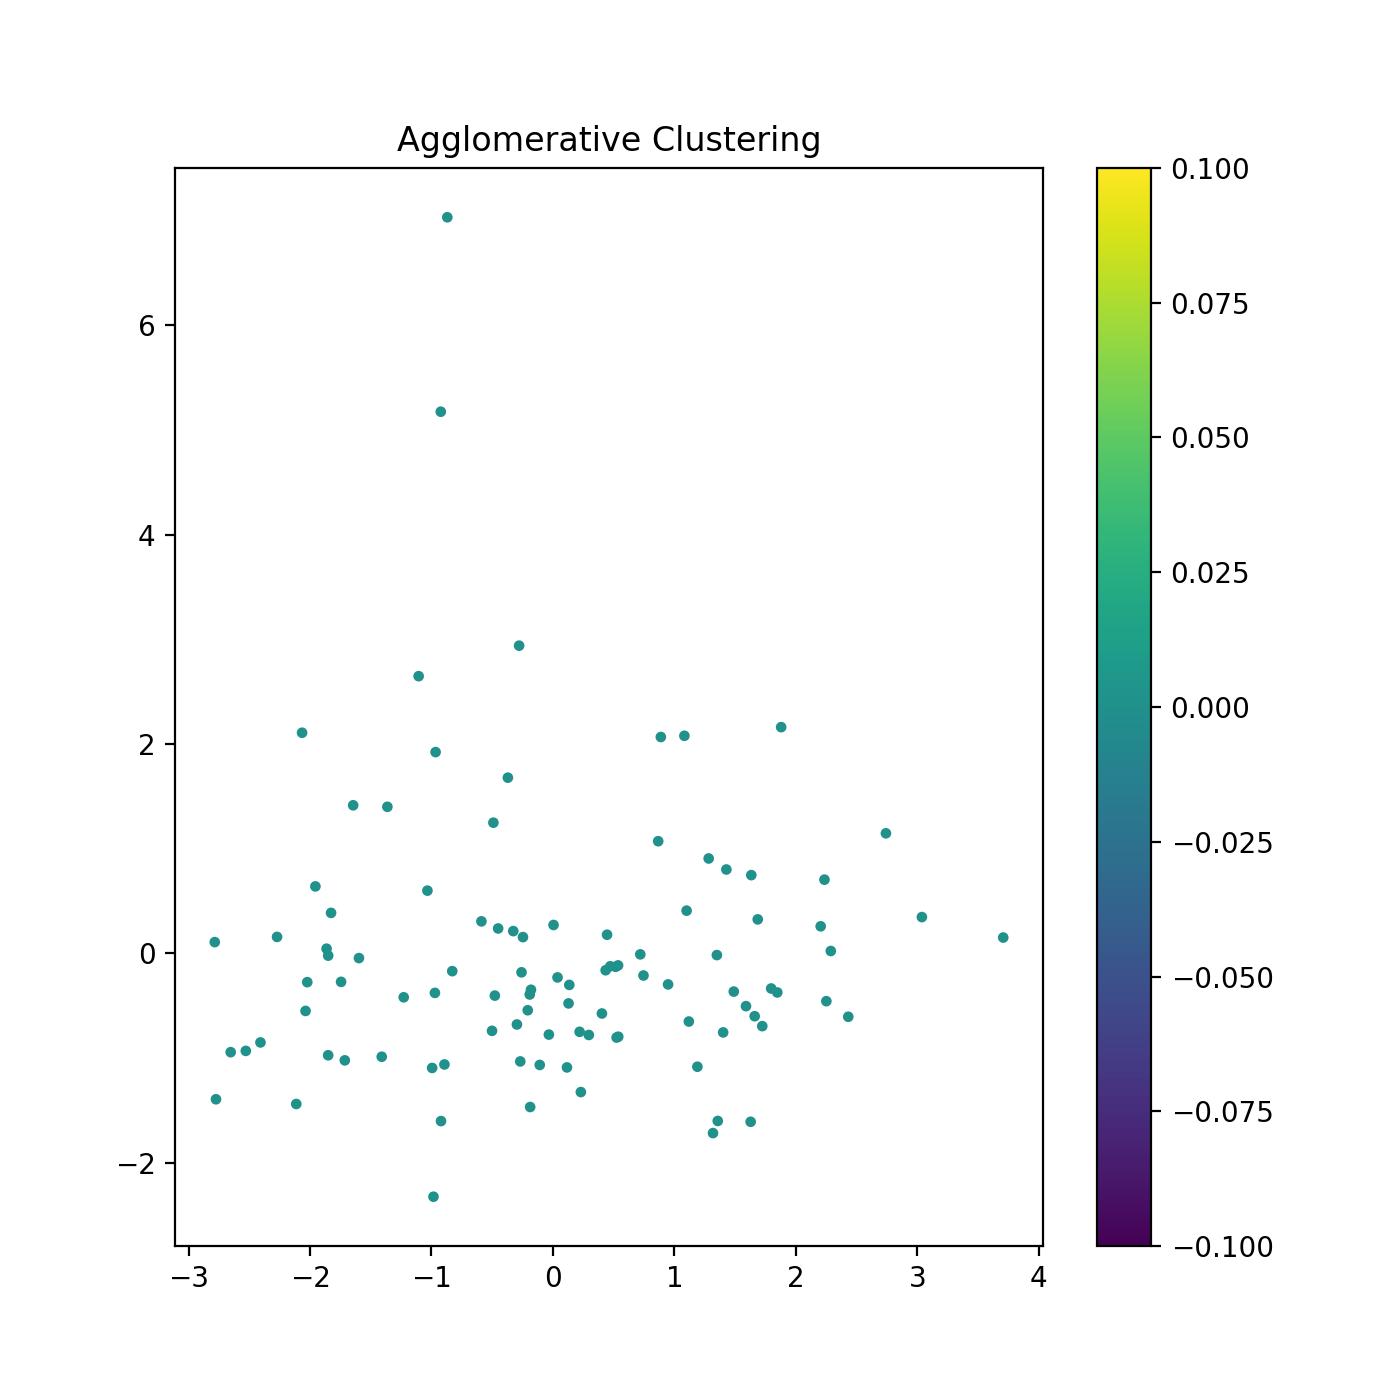

In [23]:
# Run Agglomerative clustering
run_agglomerative()